In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv("temp.csv")

In [3]:
data.head()

,Unnamed: 0,Player,Yr,Pos,Ht,S,MP,Attend,Kills,Errors,...,Assists,Aces,SErr,Digs,RErr,Block Solos,Block Assists,BErr,PTS,BHE
0,0,"Smevog, Sarah",So,L,65.0,107,29,0.0,2,2,...,111.0,31.0,24.0,469.0,18.0,0.0,0.0,0.0,33.0,2.0
1,1,"Grajeda, Thaliana",Sr,MB,72.0,107,29,0.0,190,53,...,11.0,26.0,60.0,80.0,3.0,10.0,79.0,7.0,265.5,5.0
2,2,"Nelson, Haylee",So,MB,72.0,106,29,0.0,320,143,...,17.0,10.0,26.0,135.0,6.0,9.0,46.0,3.0,362.0,0.0
3,3,"Garard, Mamie",So,S,70.0,94,25,0.0,37,7,...,618.0,8.0,44.0,193.0,0.0,0.0,14.0,4.0,52.0,32.0
4,4,"Lousi, Latahevai",Jr,OH,72.0,92,26,0.0,224,118,...,11.0,1.0,11.0,71.0,4.0,10.0,37.0,11.0,253.5,4.0


In [4]:
data.columns

Index(['Unnamed: 0', 'Player', 'Yr', 'Pos', 'Ht', 'S', 'MP', 'Attend', 'Kills',
       'Errors', 'Total Attacks', 'Hit Pct', 'Assists', 'Aces', 'SErr', 'Digs',
       'RErr', 'Block Solos', 'Block Assists', 'BErr', 'PTS', 'BHE'],
      dtype='object')

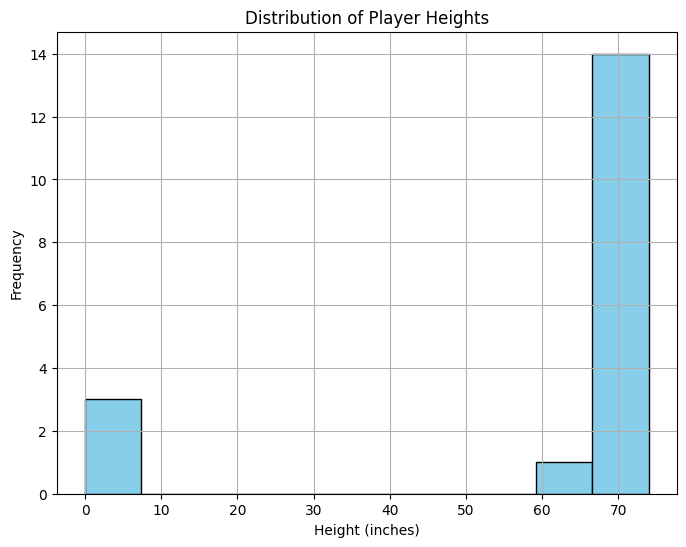

In [5]:
# Histogram of Player Heights
plt.figure(figsize=(8, 6))
plt.hist(data['Ht'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Player Heights')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

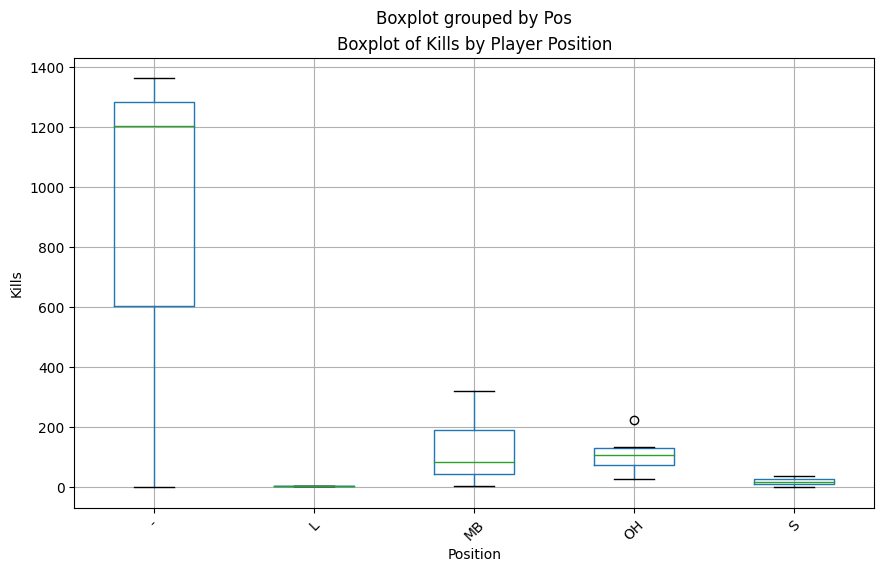

In [19]:

# Boxplot of Player Positions vs. Kills
plt.figure(figsize=(10, 6))
data.boxplot(column='Kills', by='Pos', figsize=(10, 6))
plt.title('Boxplot of Kills by Player Position')
plt.xlabel('Position')
plt.ylabel('Kills')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

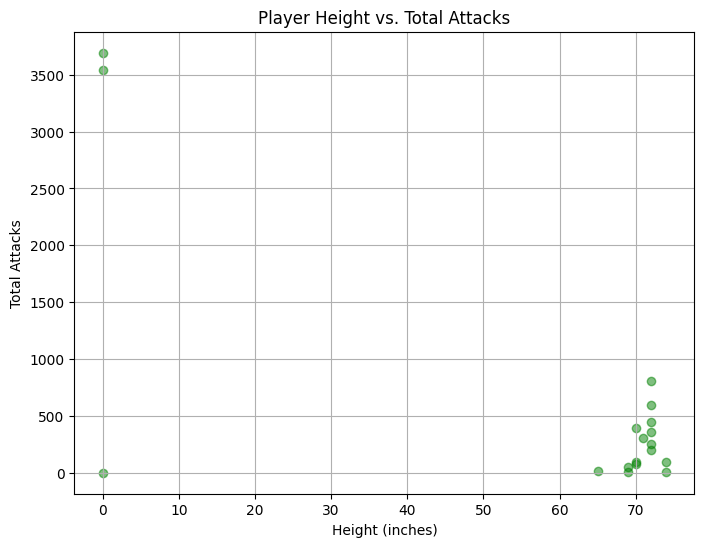

In [20]:
# Scatterplot of Player Height vs. Total Attacks
plt.figure(figsize=(8, 6))
plt.scatter(data['Ht'], data['Total Attacks'], color='green', alpha=0.5)
plt.title('Player Height vs. Total Attacks')
plt.xlabel('Height (inches)')
plt.ylabel('Total Attacks')
plt.grid(True)
plt.show()

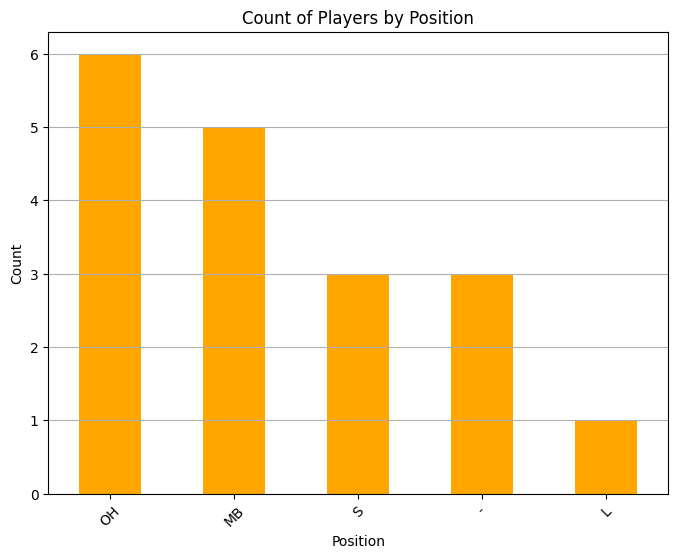

In [21]:
# Bar Chart of Player Positions
plt.figure(figsize=(8, 6))
data['Pos'].value_counts().plot(kind='bar', color='orange')
plt.title('Count of Players by Position')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

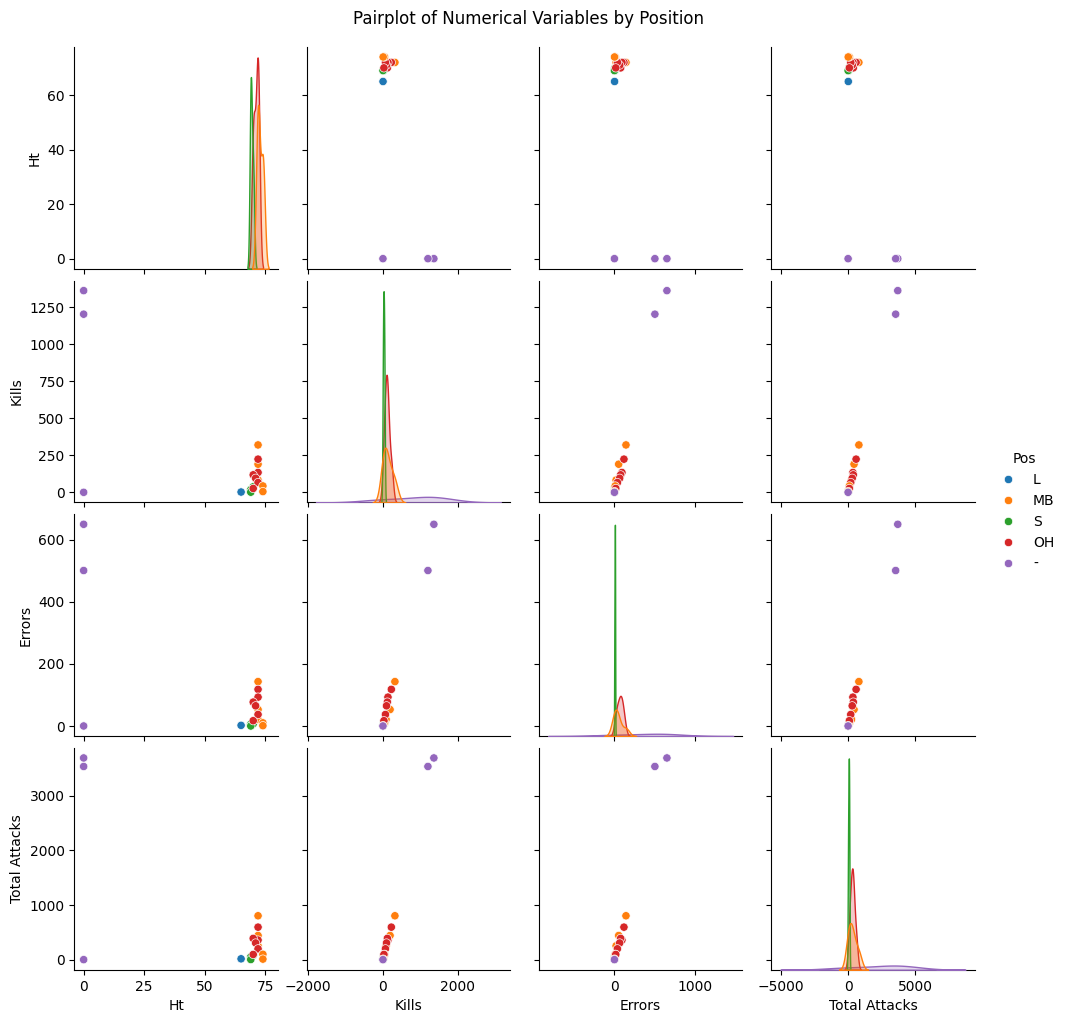

In [22]:
# Pairplot
import seaborn as sns
sns.pairplot(data, vars=['Ht', 'Kills', 'Errors', 'Total Attacks'], hue='Pos', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables by Position', y=1.02)
plt.show()


In [6]:
directory_arr = ['raw/2016/team_stats/', 'raw/2017/team_stats/', 'raw/2018/team_stats/', 'raw/2019/team_stats/']

dfs = []

cat_cols = ['Yr', 'Pos']

for directory in directory_arr:
    team_dfs = {}
    for entry in os.scandir(directory):
        if entry.is_file() and entry.name.endswith('.csv'):
            key = entry.name.replace('.csv', '')
            formatted_key = f'df_{key.replace(" ", "").replace(".", "").replace("-", "")}'
            
            team_dfs[formatted_key] = pd.read_csv(entry.path)

    def convert_height(height):
        try:
            feet, inches = height.split('-')
            return int(feet) * 12 + int(inches)
        except ValueError:
            return None

    for key in team_dfs:
        team_dfs[key]['Ht'] = team_dfs[key]['Ht'].apply(convert_height)
        team_dfs[key] = team_dfs[key ].drop(['Jersey', 'GP', 'GS', 'Trpl Dbl'], axis=1)
        team_dfs[key] = team_dfs[key].fillna(0)
        team_dfs[key][cat_cols] = team_dfs[key][cat_cols].astype('category')

    dfs.append(team_dfs)

In [24]:
dfs[0]['df_Akron'].corr()

,Ht,S,MP,MS,Kills,Errors,Total Attacks,Hit Pct,Assists,Aces,SErr,Digs,RErr,Block Solos,Block Assists,BErr,PTS,BHE
Ht,1.000000,-0.049995,0.606197,0.410246,-0.727992,-0.705107,-0.723571,-0.519028,-0.633672,-0.740454,-0.747593,-0.743904,-0.800261,-0.702201,-0.722308,-0.722417,-0.735026,-0.508654
S,-0.049995,1.000000,0.521476,0.406189,0.356958,0.353477,0.359316,0.228213,0.391008,0.446406,0.422016,0.436878,0.361723,0.289379,0.335811,0.356690,0.363745,0.358800
MP,0.606197,0.521476,1.000000,0.583092,-0.565073,-0.542776,-0.559690,-0.419399,-0.447771,-0.504117,-0.535667,-0.521927,-0.572582,-0.581038,-0.572965,-0.559341,-0.567123,-0.341135
MS,0.410246,0.406189,0.583092,1.000000,-0.185155,-0.184583,-0.180858,-0.200185,-0.073890,-0.314860,-0.269732,-0.292129,-0.342037,-0.208726,-0.178053,-0.152724,-0.197016,0.037917
Kills,-0.727992,0.356958,-0.565073,-0.185155,1.000000,0.982611,0.998436,0.680197,0.824453,0.915347,0.944429,0.932609,0.947782,0.934665,0.971810,0.984144,0.999015,0.675682
Errors,-0.705107,0.353477,-0.542776,-0.184583,0.982611,1.000000,0.989387,0.540634,0.796034,0.903341,0.915527,0.910290,0.915976,0.862168,0.913503,0.953819,0.976538,0.687281
Total Attacks,-0.723571,0.359316,-0.559690,-0.180858,0.998436,0.989387,1.000000,0.647305,0.816892,0.912137,0.937102,0.929327,0.944020,0.915364,0.958579,0.975320,0.995735,0.676705
Hit Pct,-0.519028,0.228213,-0.419399,-0.200185,0.680197,0.540634,0.647305,1.000000,0.588047,0.600099,0.684884,0.651119,0.718433,0.861735,0.807771,0.715108,0.697615,0.323359
Assists,-0.633672,0.391008,-0.447771,-0.073890,0.824453,0.796034,0.816892,0.588047,1.000000,0.807085,0.893007,0.876619,0.807380,0.772024,0.836284,0.827060,0.831143,0.950009
Aces,-0.740454,0.446406,-0.504117,-0.314860,0.915347,0.903341,0.912137,0.600099,0.807085,1.000000,0.979641,0.971311,0.961411,0.860475,0.891021,0.914071,0.927343,0.670893


In [23]:
attack_cols = ['Kills', 'Errors', 'Total Attacks', 'Hit Pct', 'Aces', 'SErr', 'BHE', 'Assists']
defense_cols = ['Digs', 'RErr', 'Block Solos', 'Block Assists', 'BErr', 'RErr']
set_cols = ['Assists', 'SErr']
general_cols = ['PTS', 'Ht', 'Pos', 'Yr', 'MP', 'MS', 'Player']
error_cols = ['Errors', 'RErr', 'SErr', 'BErr', 'BHE']

In [16]:
df = dfs[0]['df_Akron']

In [24]:
df_attack = df[attack_cols + general_cols]
df_attack

,Kills,Errors,Total Attacks,Hit Pct,Aces,SErr,BHE,Assists,PTS,Ht,Pos,Yr,MP,MS,Player
0,102,39,250,0.252,8.0,41.0,24.0,1030.0,129.5,71.0,S,Sr,28.0,28.0,"Kusan, Karley"
1,3,0,14,0.214,18.0,15.0,0.0,98.0,21.0,67.0,DS,Sr,28.0,3.0,"Mack, Brenna"
2,2,0,3,0.667,35.0,35.0,0.0,24.0,37.0,64.0,DS,So,28.0,0.0,"Pawlak, Abbey"
3,1,2,4,-0.250,34.0,31.0,0.0,23.0,35.0,67.0,DS,Sr,28.0,5.0,"Mack, Callie"
4,242,110,576,0.229,21.0,20.0,0.0,5.0,302.0,69.0,MB,So,28.0,28.0,"Brown, Patience"
5,246,132,802,0.142,4.0,4.0,0.0,11.0,262.0,70.0,OH,So,28.0,28.0,"Gwozdz, Kayla"
6,216,81,650,0.208,0.0,1.0,0.0,6.0,237.5,74.0,RS,So,28.0,26.0,"Baer, Madi"
7,3,0,8,0.375,15.0,18.0,0.0,22.0,18.0,69.0,DS,Jr,26.0,20.0,"Kozer, Aubrey"
8,121,40,314,0.258,0.0,3.0,0.0,3.0,150.5,72.0,MB,Jr,23.0,18.0,"Kloehn, Jessica"
9,170,106,499,0.128,0.0,0.0,0.0,4.0,176.5,72.0,RS,Sr,23.0,1.0,"Bedell, Amanda"


In [25]:
df_defense = df[defense_cols + general_cols]
df_defense

,Digs,RErr,Block Solos,Block Assists,BErr,RErr,PTS,Ht,Pos,Yr,MP,MS,Player
0,268.0,2.0,1.0,37.0,5.0,2.0,129.5,71.0,S,Sr,28.0,28.0,"Kusan, Karley"
1,410.0,11.0,0.0,0.0,0.0,11.0,21.0,67.0,DS,Sr,28.0,3.0,"Mack, Brenna"
2,209.0,18.0,0.0,0.0,0.0,18.0,37.0,64.0,DS,So,28.0,0.0,"Pawlak, Abbey"
3,180.0,25.0,0.0,0.0,0.0,25.0,35.0,67.0,DS,Sr,28.0,5.0,"Mack, Callie"
4,54.0,0.0,11.0,56.0,16.0,0.0,302.0,69.0,MB,So,28.0,28.0,"Brown, Patience"
5,66.0,21.0,3.0,18.0,6.0,21.0,262.0,70.0,OH,So,28.0,28.0,"Gwozdz, Kayla"
6,59.0,0.0,0.0,43.0,4.0,0.0,237.5,74.0,RS,So,28.0,26.0,"Baer, Madi"
7,183.0,13.0,0.0,0.0,0.0,13.0,18.0,69.0,DS,Jr,26.0,20.0,"Kozer, Aubrey"
8,11.0,1.0,4.0,51.0,3.0,1.0,150.5,72.0,MB,Jr,23.0,18.0,"Kloehn, Jessica"
9,37.0,4.0,0.0,13.0,1.0,4.0,176.5,72.0,RS,Sr,23.0,1.0,"Bedell, Amanda"


In [26]:
df_set = df[set_cols + general_cols]
df_set

,Assists,SErr,PTS,Ht,Pos,Yr,MP,MS,Player
0,1030.0,41.0,129.5,71.0,S,Sr,28.0,28.0,"Kusan, Karley"
1,98.0,15.0,21.0,67.0,DS,Sr,28.0,3.0,"Mack, Brenna"
2,24.0,35.0,37.0,64.0,DS,So,28.0,0.0,"Pawlak, Abbey"
3,23.0,31.0,35.0,67.0,DS,Sr,28.0,5.0,"Mack, Callie"
4,5.0,20.0,302.0,69.0,MB,So,28.0,28.0,"Brown, Patience"
5,11.0,4.0,262.0,70.0,OH,So,28.0,28.0,"Gwozdz, Kayla"
6,6.0,1.0,237.5,74.0,RS,So,28.0,26.0,"Baer, Madi"
7,22.0,18.0,18.0,69.0,DS,Jr,26.0,20.0,"Kozer, Aubrey"
8,3.0,3.0,150.5,72.0,MB,Jr,23.0,18.0,"Kloehn, Jessica"
9,4.0,0.0,176.5,72.0,RS,Sr,23.0,1.0,"Bedell, Amanda"


In [27]:
df_error = df[error_cols + general_cols]
df_error

,Errors,RErr,SErr,BErr,BHE,PTS,Ht,Pos,Yr,MP,MS,Player
0,39,2.0,41.0,5.0,24.0,129.5,71.0,S,Sr,28.0,28.0,"Kusan, Karley"
1,0,11.0,15.0,0.0,0.0,21.0,67.0,DS,Sr,28.0,3.0,"Mack, Brenna"
2,0,18.0,35.0,0.0,0.0,37.0,64.0,DS,So,28.0,0.0,"Pawlak, Abbey"
3,2,25.0,31.0,0.0,0.0,35.0,67.0,DS,Sr,28.0,5.0,"Mack, Callie"
4,110,0.0,20.0,16.0,0.0,302.0,69.0,MB,So,28.0,28.0,"Brown, Patience"
5,132,21.0,4.0,6.0,0.0,262.0,70.0,OH,So,28.0,28.0,"Gwozdz, Kayla"
6,81,0.0,1.0,4.0,0.0,237.5,74.0,RS,So,28.0,26.0,"Baer, Madi"
7,0,13.0,18.0,0.0,0.0,18.0,69.0,DS,Jr,26.0,20.0,"Kozer, Aubrey"
8,40,1.0,3.0,3.0,0.0,150.5,72.0,MB,Jr,23.0,18.0,"Kloehn, Jessica"
9,106,4.0,0.0,1.0,0.0,176.5,72.0,RS,Sr,23.0,1.0,"Bedell, Amanda"
